<a href="https://colab.research.google.com/github/Vanya-Kir/data_analysis/blob/main/%D0%9A%D0%B8%D1%80%D0%B8%D0%BB%D0%BB%D0%BE%D0%B2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 2. Разведочный анализ данных.
**Кириллов Иван ИВТМ-01-22**


**ЗАДАНИЕ**

В качестве образца выполнения задания  используйте материал, представленный ниже в раз-деле ИСТОЧНИКИ. 
Исходные данные для разведочного анализа выбираются самостоятельно, но с предваритель-ным (до анализа) согласованием с преподавателем. Данные для анализа широка представлены в Интернете.
1.	Предварительная обработка данных
- Импорт набора данных
- Проверка и обработка отсутствующих значений.

Способ 1: удалить конкретную строку, содержащую нулевое значение.

Способ 2: замена отсутствующего значения со средним, режимом или средней

- Кодирование категориальных данных.
- Разделение данных, установленного на обучение и тестовый набор.
- Функция масштабирования.


2.	Разведочный анализ данных
- Удаление дубликатов
- Обработка пропусков
- Обнаружение аномалий

Одномерный анализ
- Описательная статистика
- Важность признаков

Многомерный анализ
- Рассмотрение парных особенностей
- Уменьшение размерности, стандартизация
- Нормализация






---


В качестве данных взята таблица с описанием автомобилей.

Параметры данных:

*   Make - производитель
*   Model - модель авто
*   Year - год производства
*   Engine Fuel Type - тип топлива двигателя
*   Engine HP - двигатель л.с.
*   Engine Cylinders - цилиндры двигателя
*   Transmission Type - тип трансмиссии
*   Driven_Wheels - ведомые Колеса
*   Number of Doors - кол-во дверей
*   Market Category - категория рынка
*   Vehicle Size - размер автомобиля
*   Vehicle Style - стиль автомобиля
*   highway MPG - шоссе MPG
*   city mpg - город MPG
*   Popularity - популярность
*   MSRP - цена


In [44]:
#Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) 
sns.set(color_codes=True)

In [45]:
#Загрузка набора данных
data = pd.read_csv("/content/sample_data/car.csv")

In [46]:
#Просмотр данных
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [47]:
#Оценка столбцов/поиск недостающих значений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [48]:
#Поиск пропущенных значений
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [49]:
#Удаляем столбец 'Market Category'
data = data.drop(['Market Category'], axis=1)
#Удаляем строки с пустыми значениями
data = data.dropna()
#Удаляем дкбликаты
duplicate_rows_data = data[data.duplicated()]
print("кол-во дубликатов: ", duplicate_rows_data.shape)
data = data.drop_duplicates()
print("Итоговое кол-во строк без дубликатов:", data.shape)


кол-во дубликатов:  (720, 15)
Итоговое кол-во строк без дубликатов: (11092, 15)


In [50]:
#Просмотр данных
data.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,26,17,61,28995


In [51]:
#Разделение данных, установленного на обучение, тестовый набор и валидацию.
np.random.seed(2)

n = len(data)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = data.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

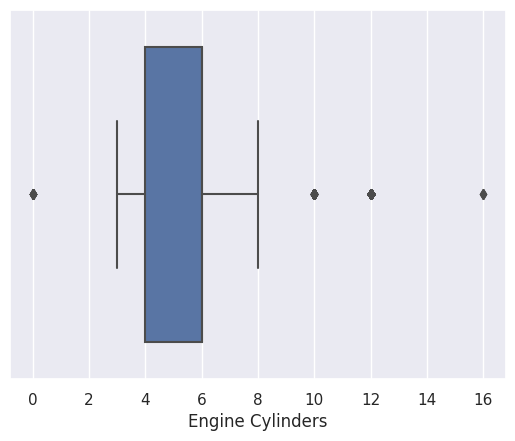

In [52]:
#Обнаружение выбросов по кол-ву цилиндров
sns.boxplot(x=data['Engine Cylinders'])
plt.show()

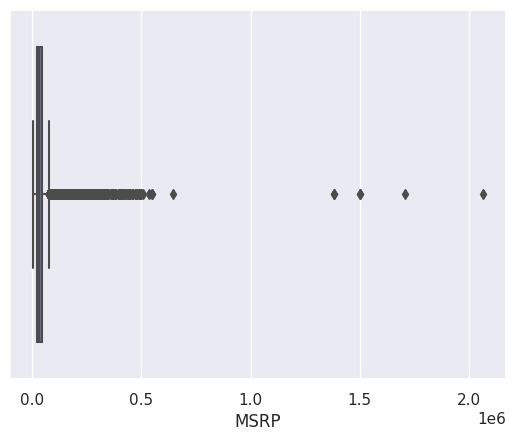

In [53]:
#Обнаружение выбросов по цена
sns.boxplot(x=data['MSRP'])
plt.show()

# Одномерный анализ

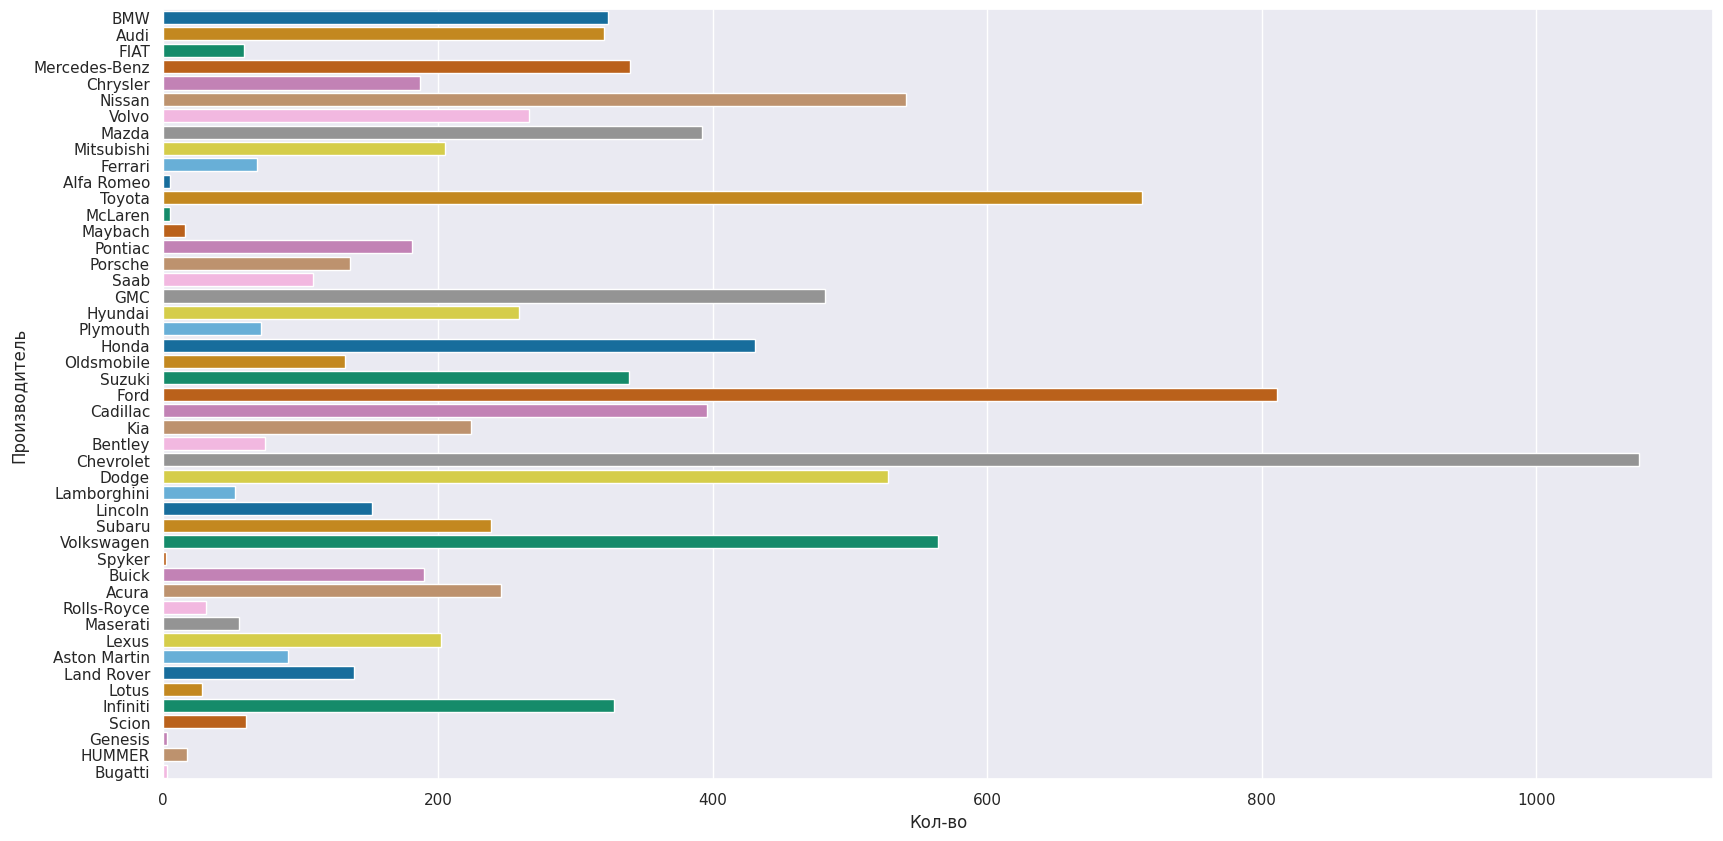

In [54]:
#Количество машин от каждого производителя (диаграмма)
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(y='Make',data=data,palette='colorblind', ax = ax)
plt.xlabel('Кол-во')
plt.ylabel('Производитель')
plt.show()


In [55]:
#Количество машин от каждого производителя (в числах)
data['Make'].value_counts()

Chevrolet        1075
Ford              811
Toyota            713
Volkswagen        564
Nissan            541
Dodge             528
GMC               482
Honda             431
Cadillac          396
Mazda             392
Mercedes-Benz     340
Suzuki            339
Infiniti          328
BMW               324
Audi              321
Volvo             266
Hyundai           259
Acura             246
Subaru            239
Kia               224
Mitsubishi        205
Lexus             202
Buick             190
Chrysler          187
Pontiac           181
Lincoln           152
Land Rover        139
Porsche           136
Oldsmobile        132
Saab              109
Aston Martin       91
Bentley            74
Plymouth           71
Ferrari            68
Scion              60
FIAT               59
Maserati           55
Lamborghini        52
Rolls-Royce        31
Lotus              28
HUMMER             17
Maybach            16
McLaren             5
Alfa Romeo          5
Genesis             3
Bugatti   

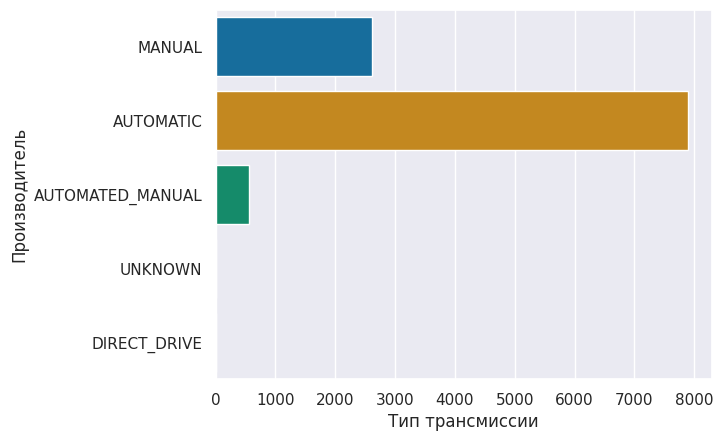

In [56]:
#Кол-во машин по типу трансмиссии (диаграмма)
sns.set_style('darkgrid')
sns.countplot(y='Transmission Type',data=data,palette='colorblind')
plt.xlabel('Тип трансмиссии')
plt.ylabel('Производитель')
plt.show()

In [57]:
#Кол-во машин по типу трансмиссии (в числах)
data['Transmission Type'].value_counts()

AUTOMATIC           7893
MANUAL              2620
AUTOMATED_MANUAL     552
DIRECT_DRIVE          15
UNKNOWN               12
Name: Transmission Type, dtype: int64

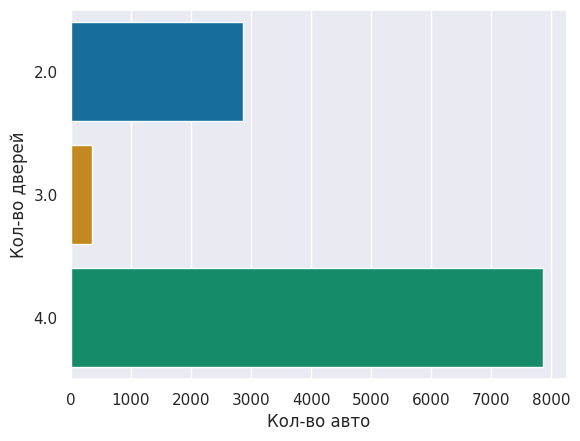

In [58]:
#Количество машин по кол-ву дверей (диаграмма)
sns.set_style('darkgrid')
sns.countplot(y='Number of Doors',data=data,palette='colorblind')
plt.xlabel('Кол-во авто')
plt.ylabel('Кол-во дверей')
plt.show()

In [59]:
#Количество машин по кол-ву дверей (в числах)
data['Number of Doors'].value_counts()

4.0    7866
2.0    2870
3.0     356
Name: Number of Doors, dtype: int64

In [60]:
#Важность признаков
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data[['Year','Engine HP','Engine Cylinders','Number of Doors','highway MPG','city mpg','MSRP']]
y = data.iloc[:, -1]

bestfeatures = SelectKBest(score_func = chi2, k = 'all')
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Specs', 'Score']  
print(featureScores.nlargest(10, 'Score'))  

              Specs         Score
6              MSRP  1.008891e+09
1         Engine HP  4.929881e+05
5          city mpg  1.551370e+04
4       highway MPG  1.382977e+04
2  Engine Cylinders  4.999034e+03
3   Number of Doors  1.597509e+03
0              Year  2.579334e+02


# Многомерный анализ

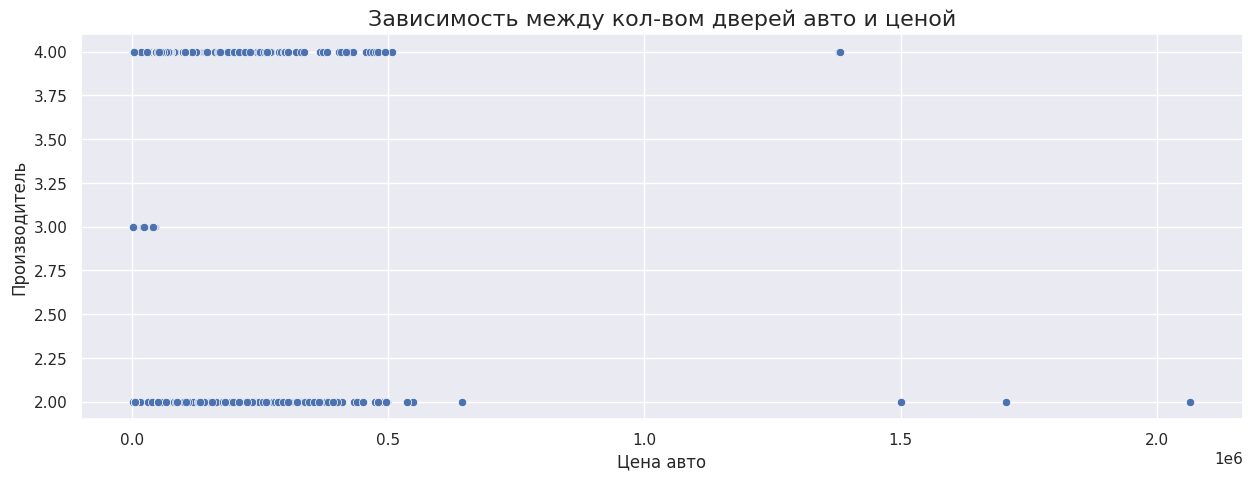

In [61]:
#Зависимость между производителем авто и ценой
sns.set(rc={"figure.figsize":(15, 5)})
plt.title('Зависимость между кол-вом дверей авто и ценой',size=16)
plt.xlabel('Цена авто',size=12)
plt.ylabel('Производитель',size=12)
sns.scatterplot(x='MSRP', y='Number of Doors', data=data)
plt.show()

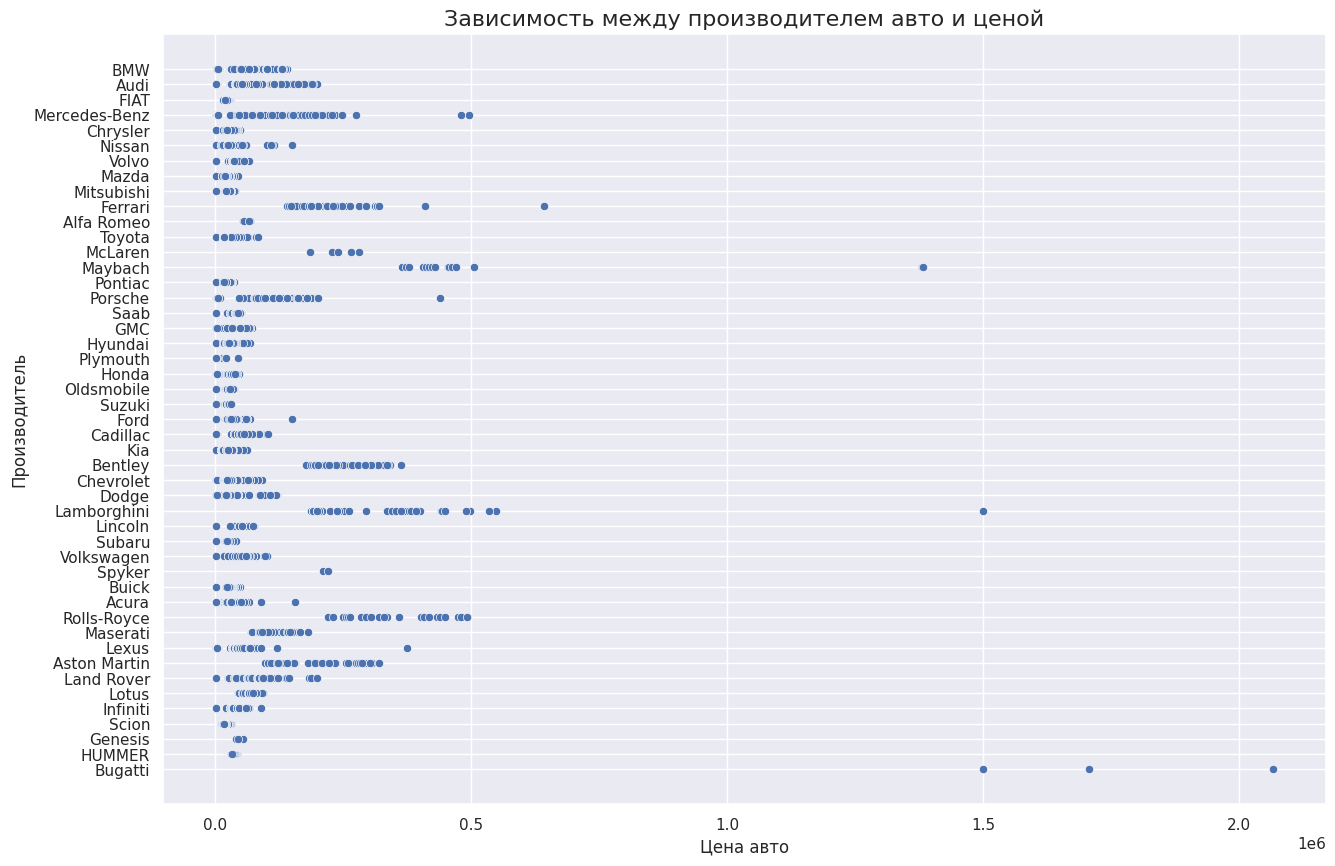

In [62]:
#Зависимость между производителем авто и ценой
sns.set(rc={"figure.figsize":(15, 10)})
plt.title('Зависимость между производителем авто и ценой',size=16)
plt.xlabel('Цена авто',size=12)
plt.ylabel('Производитель',size=12)
sns.scatterplot(x='MSRP', y='Make', data=data)
plt.show()

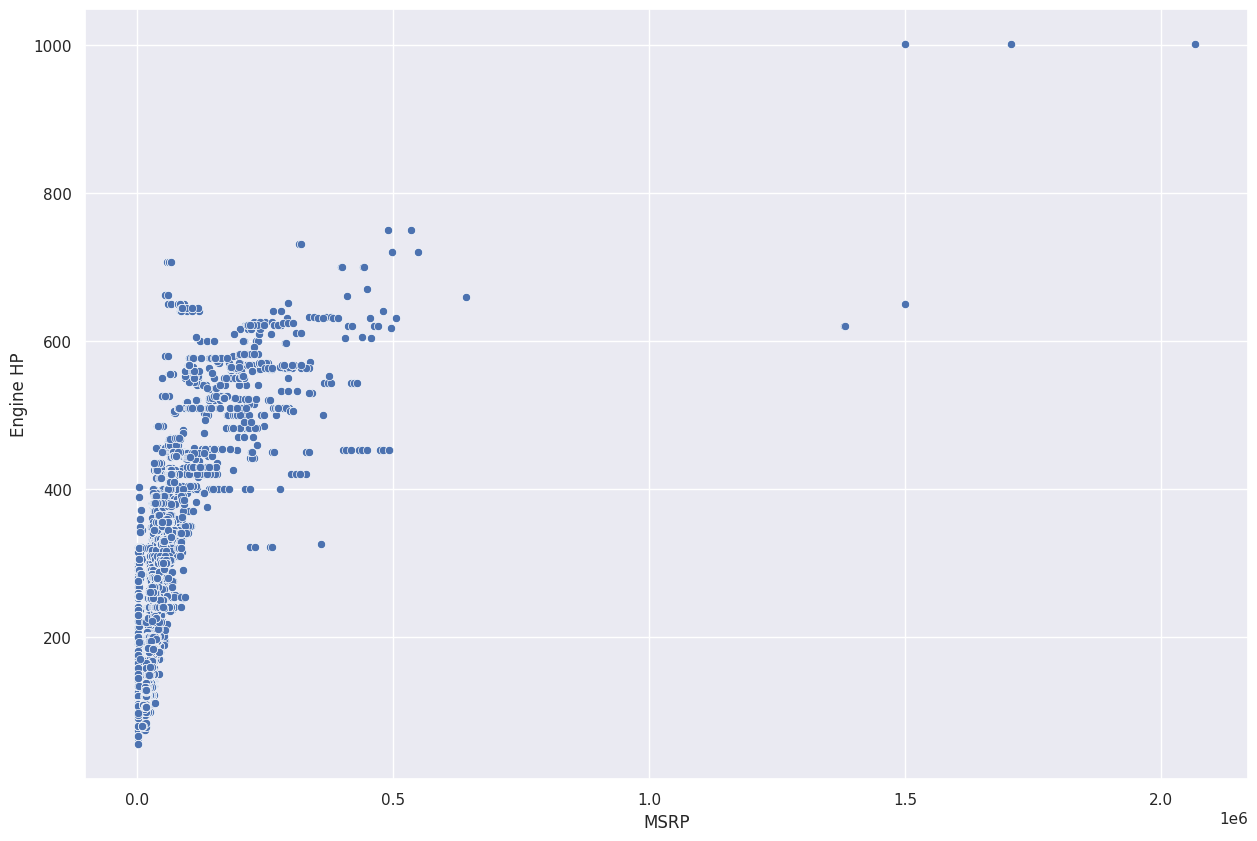

In [63]:
#Диаграмма рассеяния по мощности двигателя и цене 
sns.set(rc={"figure.figsize":(15, 10)})
# plt.title('Зависимость между кол-вом цилиндров и ценой',size=16
sns.scatterplot(
    data=data, x="MSRP", y="Engine HP"
)
plt.show()

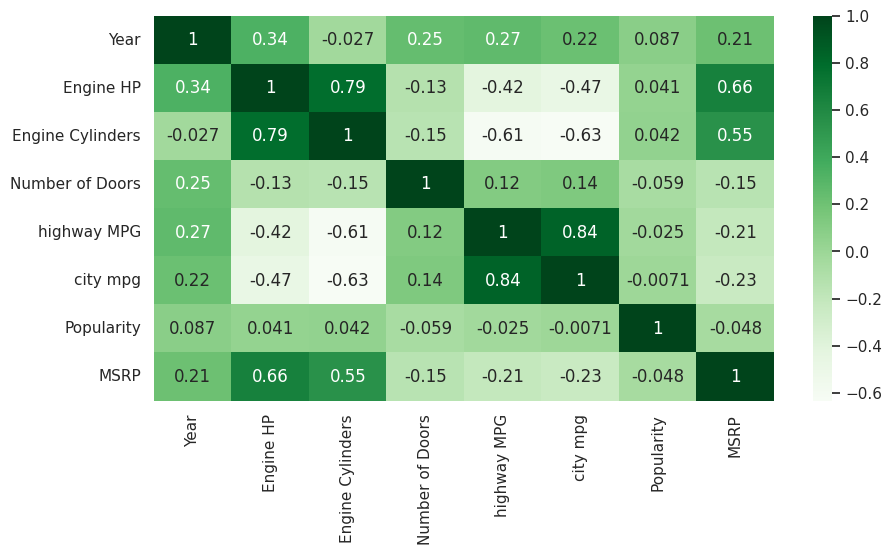

In [64]:
#Корреляция между столбцами
plt.figure(figsize=(10,5))
c= data.corr()
sns.heatmap(c,cmap="Greens",annot=True)
# c
plt.show()

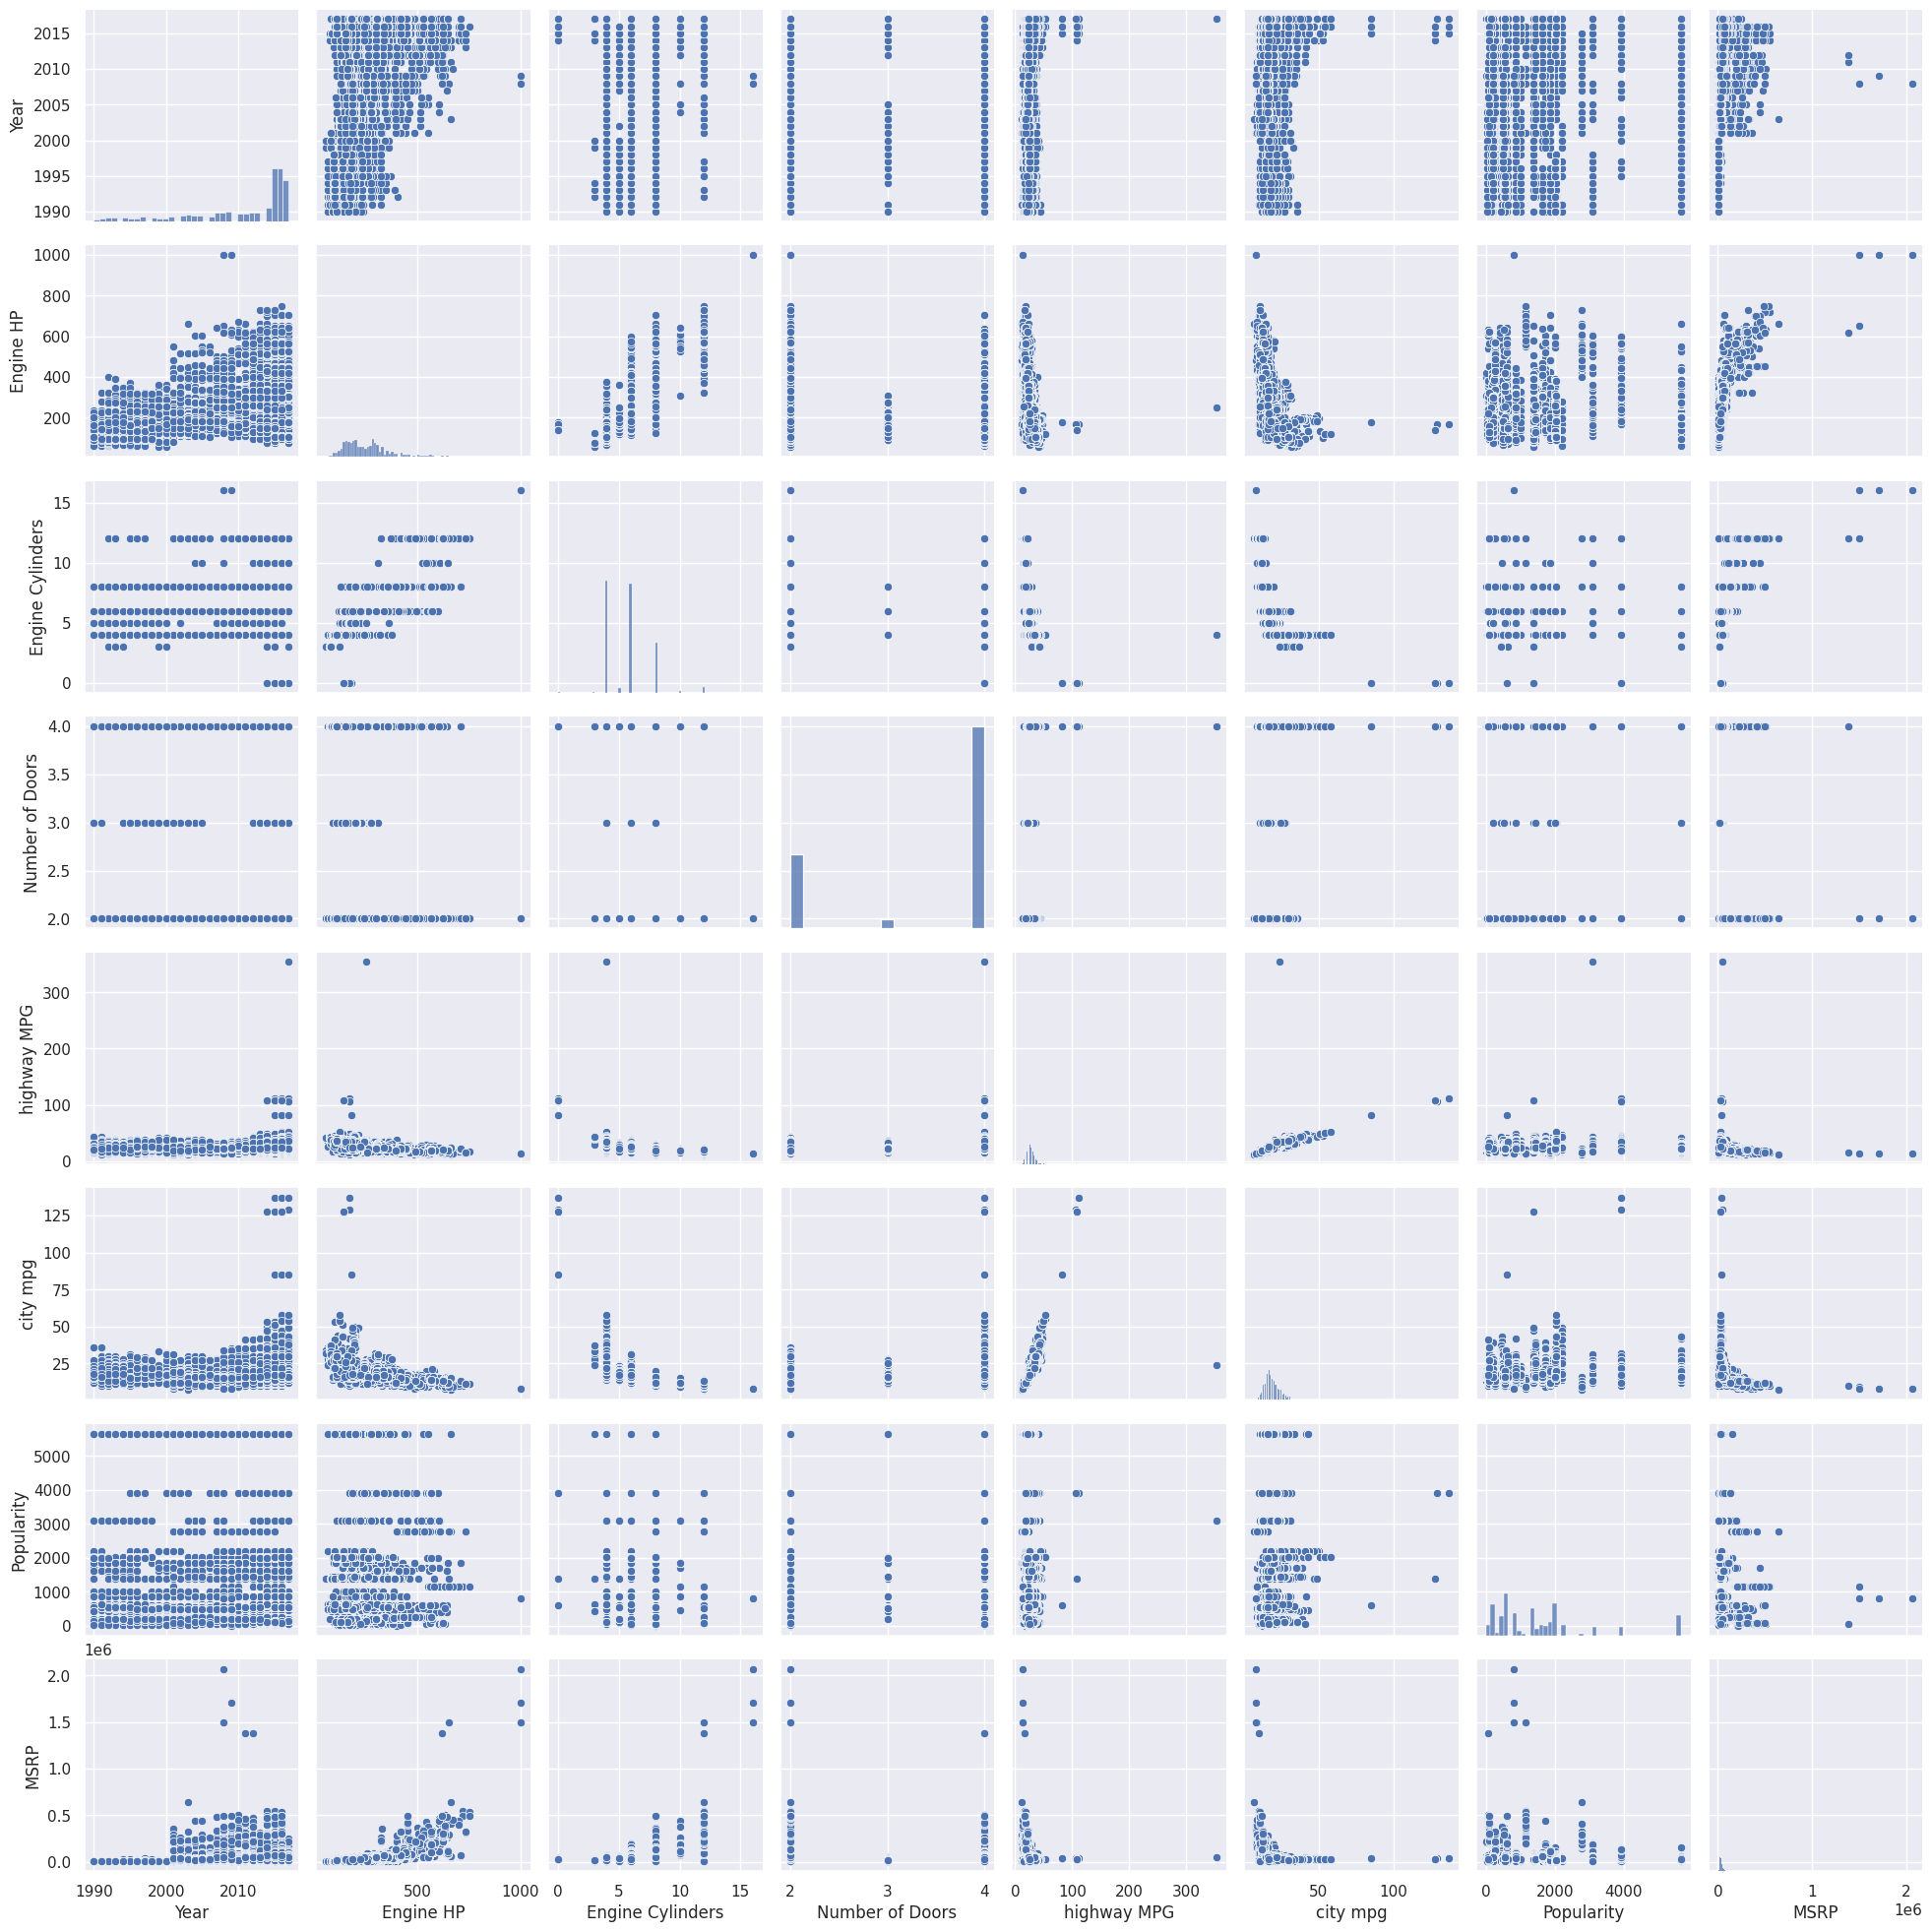

In [65]:
#Строим парные отношения в наборе данных
sns.pairplot(data=data)
plt.show()

In [66]:
#Уменьшение размерности, стандартизация
# Создадим список признаков, подлежащих уменьшению
features = ['Year','Engine HP','Engine Cylinders','Number of Doors','highway MPG','city mpg','MSRP']
# Выбираем сокращаемые признаки и целевой
x = data.loc[:, features].values
# y = df.loc[:,['y']].values

In [67]:
#Выполняем Стандартизацию
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,MSRP
0,0.042283,0.739442,0.17666,-1.65826,-0.036479,-0.045518,0.068456
1,0.042283,0.421779,0.17666,-1.65826,0.230863,-0.045518,-0.020384
2,0.042283,0.421779,0.17666,-1.65826,0.230863,0.105873,-0.090031
3,0.042283,-0.213547,0.17666,-1.65826,0.230863,-0.196910,-0.201789
4,0.042283,-0.213547,0.17666,-1.65826,0.230863,-0.196910,-0.119995


In [68]:
# Анализ главных компонент (Principal Component Analysis) представляет собой метод 
# уменьшения размерности больших наборов данных путем преобразования большого 
# набора переменных в меньший с минимальными потерями информативности.
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-0.712858,-0.094347
1,-0.418487,-0.148275
2,-0.325958,-0.129277
3,-0.128588,-0.484314
4,-0.157477,-0.453118


In [69]:
#Нормализация
from sklearn import preprocessing

df = pd.read_csv("/content/sample_data/car.csv")

# Выберем признаки, выраженные вещественными числами и подлежащие 
# нормализации
features = ['Year','Engine HP','Engine Cylinders','Number of Doors','highway MPG','city mpg','MSRP']
x = df.loc[:, features].values

# Инициализируем нормализатор 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled) 
df

,0,1,2,3,4,5,6
0,0.777778,0.295983,0.375,0.0,0.040936,0.092308,0.021384
1,0.777778,0.258985,0.375,0.0,0.046784,0.092308,0.018727
2,0.777778,0.258985,0.375,0.0,0.046784,0.100000,0.016643
3,0.777778,0.184989,0.375,0.0,0.046784,0.084615,0.013300
4,0.777778,0.184989,0.375,0.0,0.046784,0.084615,0.015747
...,...,...,...,...,...,...,...
11909,0.814815,0.258985,0.375,1.0,0.032164,0.069231,0.021377
11910,0.814815,0.258985,0.375,1.0,0.032164,0.069231,0.026489
11911,0.814815,0.258985,0.375,1.0,0.032164,0.069231,0.023557
11912,0.851852,0.258985,0.375,1.0,0.032164,0.069231,0.023703
